# Build a Bigram Language Model

This file can be found in the Git repo: https://github.com/GauravAtavale/Large-Language-Model-in-7-days

#### **Quick Definitions**

> **`Bigram Language Model`**: It is the simplest statistical model used in Natural Language Processing (NLP) tasks to predict next word or character based on the immediately preceding word or character. The core idea is to generate a distribution based on frequency of co-occurance of items (Bi-gram).

> **`Tokenization`**: The process of breaking text into smaller units (tokens), such as words, subwords, or characters, for model input.

> **`Vocabulary`** : The set of unique tokens (words, subwords) a model recognizes, mapped to IDs for embedding lookups.


#### **What are we covering here?**

```
Task 1: Name Generation using the next charachter prediction
          - For simplicity, we use names of people to train the model and try to generate new Names
          - This task is inspired by Andrej Karpathy's work
          - A bigram model will be implement for this task

Task 2: Words Generation using the next charachter prediction
          - Using the articles from 'cnn_dailymail' dataset, we will try to learn to generate words using the bigram approach

```



# Task 1: Name Generation using the next charachter prediction

In [1]:
# Import relevant libraries
from google.colab import drive
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# drive.mount('/content/drive') # The file can be uploaded to drive. Don't forget to mount drive in that case

In [2]:
# The file is in the Git repo: https://github.com/GauravAtavale/Large-Language-Model-in-7-days

# This file has a list of 32033 names collected. This dataset will be used to generate new names.
git_url = "https://raw.githubusercontent.com/GauravAtavale/Large-Language-Model-in-7-days/refs/heads/main/names.txt"
response = requests.get(git_url)
response.raise_for_status()
words = response.text.splitlines()

#words = open('names.txt','r').read().splitlines() # if the file is local
print(f"Data type of words: {type(words)} \nNumber of names in file: {len(words)}")

Data type of words: <class 'list'> 
Number of names in file: 32033


In [3]:
# Looking at the first 10 names in the file
# Note: this dataset is a cleaned dataset with only alphbets(lowercase) in it. No need to clean further
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

#### To build the bigram model we need to count the frequncy of what follows what
#### In this case we can break this down by characters and get a frequence distribution of what character follows what. This makes the characters to be tokens, implying this to be a character level model  
#### **Example:** if 'b' succeeds 'a' 25 times it can be represented as **`'a'->'b':25`**





In [4]:
print(f"If the name is '{words[0]}'\n")

print("Name Begins with --->",  words[0][0])
print(f"Next '{words[0][1]}' to form --->",  words[0][0:2])
print(f"Next '{words[0][2]}' to form --->",  words[0][0:3])
print(f"Next '{words[0][3]}' to form --->",  words[0][0:4])

print("\nFrequency distribution from above\n'e'->'m': 1 \n'm'->'m': 1 \n'm'->'a': 1")

If the name is 'emma'

Name Begins with ---> e
Next 'm' to form ---> em
Next 'm' to form ---> emm
Next 'a' to form ---> emma

Frequency distribution from above
'e'->'m': 1 
'm'->'m': 1 
'm'->'a': 1


In [5]:
print(f"If the name is '{words[1]}'\n")
print("Name Begins with --->",  words[1][0])
print(f"Next '{words[1][1]}' to form --->",  words[1][0:2])
print(f"Next '{words[1][2]}' to form --->",  words[1][0:3])
print(f"Next '{words[1][3]}' to form --->",  words[1][0:4])
print(f"Next '{words[1][4]}' to form --->",  words[1][0:5])
print(f"Next '{words[1][5]}' to form --->",  words[1][0:6])


print("\nFrequency distribution from above\n'o'->'l': 1 \n'l'->'i': 1 \n'i'->'v': 1\n'v'->'i': 1\n'i'->'a': 1")

If the name is 'olivia'

Name Begins with ---> o
Next 'l' to form ---> ol
Next 'i' to form ---> oli
Next 'v' to form ---> oliv
Next 'i' to form ---> olivi
Next 'a' to form ---> olivia

Frequency distribution from above
'o'->'l': 1 
'l'->'i': 1 
'i'->'v': 1
'v'->'i': 1
'i'->'a': 1


> The best way to achieve this is to use a dictionary, which holds Key as ('e' followed by 'm').

> This We can indicate with a tuple ('e','m') -- indicating 'e' followed by 'm'. The value of the dictionary is the count of occurance of char 1 followed by char 2.

> Also we need to indicate the start of name with an indicator `'<S>'` and end of name by `'<E>'`



In [6]:
# The start and end tokens can be added easily by list concatenation
# Example -
for w in words[0:2]:
  chs = ['<S>'] + list(w) + ['<E>'] # introduce Start and End tokens
  print(chs)

['<S>', 'e', 'm', 'm', 'a', '<E>']
['<S>', 'o', 'l', 'i', 'v', 'i', 'a', '<E>']


In [7]:
# Keys can be efficiently formed with the zip function to form keys of ('char1', 'char2')
# Example -
for w in words[0:1]:
  chs = ['<S>'] + list(w) + ['<E>'] # introduce Start and End tokens
  for c1,c2 in zip(chs,chs[1:]): # This will zip the same string with consecutive pairs
    bigram = (c1,c2)
    print(bigram)

('<S>', 'e')
('e', 'm')
('m', 'm')
('m', 'a')
('a', '<E>')


In [8]:
# All we need to do now is to add a counter whenever an instance is seen
# Combining all steps
bi_dict = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>'] # in order to introduce Start and End tokens need to be converted to list
  for c1,c2 in zip(chs,chs[1:]): # This will zip the same string with consecutive pairs
    bigram = (c1,c2)
    bi_dict[bigram] = bi_dict.get(bigram,0) + 1 # get value of the key if exists, else get 0 and add 1

In [9]:
# show first 10 items in the dictionary
dict(list(bi_dict.items())[0:10])

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911}

## Plot the distribution of next characters

In [10]:
first_char = 'a'
vals = []
second_chars = []

# Get the list of count of succeeding characters
for k, v in bi_dict.items():
  if k[0] == first_char:
    vals.append(v)
    second_chars.append(k[1])
# Sort by values
vals_sorted, second_chars_sorted = [], []
for i in np.argsort(vals)[::-1]:
  vals_sorted.append(vals[i])
  second_chars_sorted.append(second_chars[i])

# Get in percentages
vals_sum = sum(vals_sorted)
vals_sorted = [x/vals_sum for x in vals_sorted]

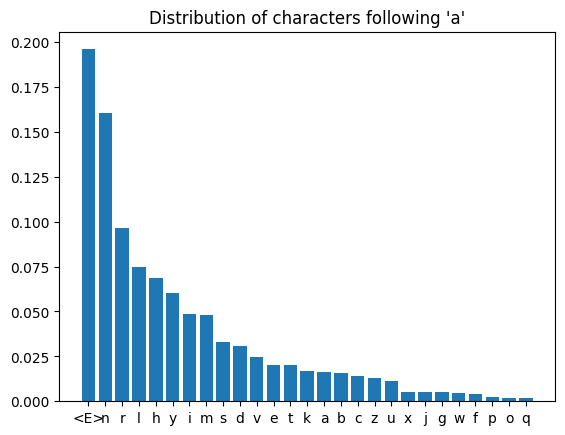

In [11]:
# plt.figure(figsize=(10,5))
plt.bar(second_chars_sorted,vals_sorted)
plt.xticks(range(len(second_chars_sorted)),second_chars_sorted, rotation=0)
plt.title(f"Distribution of characters following '{first_char}'")
plt.show()

> Nearly 20% of the times, there is no other character succeeding 'a', implying end of the name.

## Convert this into a 2D array such that rows = first char and column = second char

> This is for better representation, visualization and for creating a look up table for easy access

In [12]:
# First let's check Unique characters in the data
chars = sorted(list(set(''.join(words))))
print("Unique Charachters:", chars)
print("Number of unique Chars:", len(chars))

Unique Charachters: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique Chars: 26


**Note:** The names dataset doesn't contain any special characters and all alphabets are small case. So no need to data cleaning needed here

In [13]:
# One way is to convert to 2D arrays is using pandas. The other straightforward way is using torch 2D matrix
import torch

# we have 26 alphabets + 2 Special chars (<'S'> and <'E'>).
# But keep in mind <'E'> will not appear at the beginning of a string and <'S'> will not appear at the end of a string
# Effectively there should be 27 chars in row and column of the matrix
N = torch.zeros((27,27), dtype=torch.int32)

### Create Vocabulary and update Matrix N

> N will be a 2D matrix with all zeros. To update the counts of corresponding <first> and <second> char, let's first create a dictionary to represent Unique characters to index (Vocabulary)

In [14]:
# Note: 'chars' is sorted list of unique characters and index starts from 1....26
string_to_ind = {s:i+1 for i,s in enumerate(chars)} # +1 is to offset so that a starts with index 1

# We can introduce tokens <'S'> and <'E'>. But since we will have <'S'> as the first char(rows) and <'E'> as second (columns)
# it would be convinient to replace them with '.', depicting start and end when represented in row or col respectively
string_to_ind['.'] = 0

print(dict(list(string_to_ind.items())[0:5]))
print(dict(list(string_to_ind.items())[22:]))

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
{'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [15]:
# Get reverse of string_to_ind for labelling later
ind_to_string = {i:s for s,i in string_to_ind.items()}

In [16]:
# Update Matrix N

# Similar idea as last time - But now using '.' for both start and end tokens
for w in words:
  chs = ['.'] + list(w) + ['.'] # in place of Start and End tokens
  for c1,c2 in zip(chs,chs[1:]): # This will zip the same string with consecutive pairs
    N[string_to_ind[c1], string_to_ind[c2]] += 1

In [17]:
# This would represent frequency of all characters starting with string_to_ind[0] => '.' and columns is the corresponding second char
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

**Note:** N[0][0] is 0 as expected. It can not have '.' immediately after '.'

### Get the probability distribution (% frequency) across the rows (sum of a row =1)

In [18]:
# Get sum across rows and devide
probs = N/N.sum(dim=1, keepdim = True)

In [19]:
# Check the probability distribution first char ('.')
probs[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

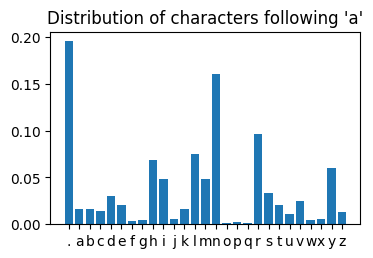

In [20]:
# This is similar to shown graph previously. But unsorted
first_char = 'a'
p = probs[string_to_ind[first_char]]
plt.figure(figsize=(4,2.5))
plt.bar(dict(sorted(string_to_ind.items(), key=lambda item: item[1])).keys(), p)
# plt.xticks()
plt.title(f"Distribution of characters following '{first_char}'")
plt.show()

## Plot the Probability distribution Matrix

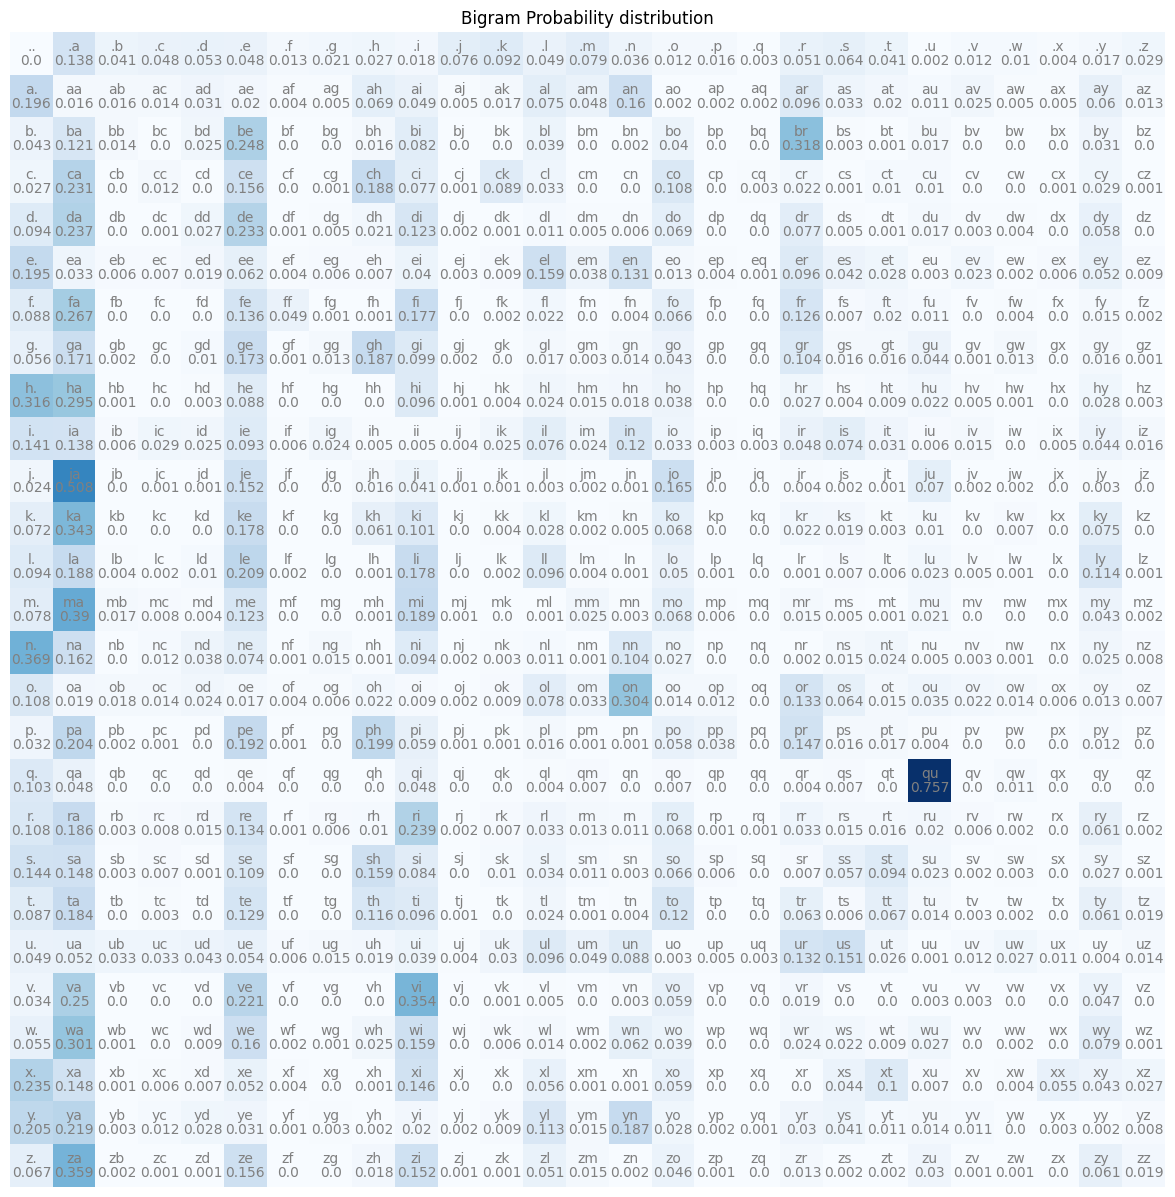

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,15))
plt.imshow(probs, cmap = 'Blues')
for i in range(27):
  for j in range(27):
    ch_str = ind_to_string[i] + ind_to_string[j]
    plt.text(j,i,ch_str, ha='center', va='bottom', color='gray')
    plt.text(j,i,round(probs[i,j].item(), 3), ha='center', va='top', color='gray')
plt.axis('off')
plt.title('Bigram Probability distribution')
plt.show()

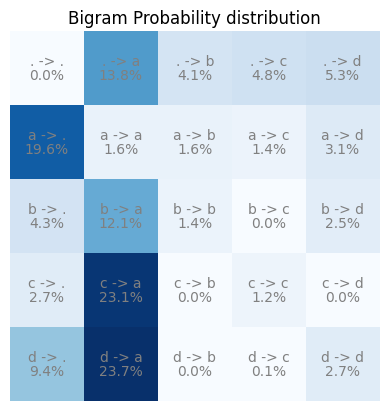

In [22]:
# Showing a slice of the matrix for Clarity. Here probability of b succeeding a is 1.9% etc
plt.imshow(probs[0:5,0:5], cmap = 'Blues')
for i in range(5):
  for j in range(5):
    ch_str = ind_to_string[i] +" -> "+ ind_to_string[j]
    plt.text(j,i,ch_str, ha='center', va='bottom', color='gray')
    plt.text(j,i,str(round(probs[i,j].item()*100, 1))+"%", ha='center', va='top', color='gray')
plt.axis('off')
plt.title('Bigram Probability distribution')
plt.show()

## How to use this Probability distribution for prediction?

> torch.multinomial helps to draw samples from a distribution based on provided probabilities. An illustration is shown below

In [23]:
# **************************** Just forIllustration **************************** #
# Testing for fun
g = torch.Generator().manual_seed(1) # This just seeding - helps for repreoducabaility
test_data = torch.randint(0,25,(3,),generator=g) #torch.rand(3,generator=g)
print(f"test_data:\n{test_data}\n" )

test_prob = test_data/test_data.sum()
print(f"test_data Probability distribution:\n{np.round(test_prob,3)}\n")

test_n = 10
mult_vals = torch.multinomial(test_prob, num_samples=test_n, replacement=True, generator = g)
print(f"index of samples drawn from given probability distribution \n{mult_vals}\n")

print(f"samples drawn randomly:\n{[test_data[i].item() for i in mult_vals]} \n" )

print(f"check if the new distribution matches with original:\n{torch.unique(mult_vals, return_counts=True)[1]/test_n}")

test_data:
tensor([20, 14, 24])

test_data Probability distribution:
tensor([0.3450, 0.2410, 0.4140])

index of samples drawn from given probability distribution 
tensor([2, 1, 0, 1, 0, 1, 2, 2, 0, 1])

samples drawn randomly:
[24, 14, 20, 14, 20, 14, 24, 24, 20, 14] 

check if the new distribution matches with original:
tensor([0.3000, 0.4000, 0.3000])


> The samples drawn from population always resembles the population distribution.

## Generate names by predicting the next character

In [24]:
# Using torch.multinomial to draw 1 sample from given distribution
def get_sample_from_distrn(distrn): return torch.multinomial(distrn, num_samples=1, replacement=True, generator = g).item()

In [25]:
g = torch.Generator().manual_seed(7) # This just seeding - helps for repreoducabaility
start_ind = 0 # starting with token '.'
for _ in range(10):
  while True:
    # start_ind = get_sample_from_distrn(prob_distrn(N[start_ind]))
    start_ind = get_sample_from_distrn(probs[start_ind])
    print(ind_to_string[start_ind], end='')
    if ind_to_string[start_ind] == '.':
      break
  print()

anish.
e.
hililtteir.
cyeldy.
cann.
met.
kayaeda.
kausi.
fileslara.
ka.


> Sounds a bit name like -- not too bad for a start!!!

# Task 2: Words Generation using the next charachter prediction

```
- Now let's focus on generating real English words.
- We can use the articles from 'cnn_dailymail' dataset as the training set.
- Again the tokens here will be alphabets and the CNN data is used to understand the relationship between characters.
- Vocabulary is the 26 alphabets + start/end token.

```

In [26]:
# don't show installation comments
! pip install -q datasets
! pip install -q contractions

In [27]:
from datasets import load_dataset
import nltk
import regex as re
from contractions import contractions_dict
import torch
import numpy as np
import pandas as pd
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader


# dataset = load_dataset("ccdv/cnn_dailymail", '3.0.0', trust_remote_code=True)
# cnn_dataset = load_dataset("cnn_dailymail", "3.0.0" , quiet=True)
cnn_dataset = load_dataset("cnn_dailymail", "3.0.0")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


> We can't always be sure the data we get is always clean. So the following helper functions are used to clean the data

In [28]:
def get_data_corpus(data, n):
  """ Gets a string of n articles from the dataset
      Input - dataset, number of articles
      Output - string of n articles
  """
  corp = ''
  for i in range(n):
    corp = corp + ' '+ data['train'][i]['article']
  return corp

# Get expanded contractions
def expand_contractions(text, contraction_map=contractions_dict):
  """ Gets the expanded contractions
      Input - text: string, contraction_map: with all English contraction-expansion map
      Output - string of n articles with expanded contractions
  """
  con_key = '|'.join(contraction_map.keys())
  cppp = re.compile(f'({con_key})', flags=re.DOTALL)

  def e_m(contraction):
      match = contraction.group(0)
      exp_c = contraction_map.get(match)
      if not expand_contractions:
          print(match)
          return match
      return exp_c

  text_e = cppp.sub(e_m, text)
  text_e = re.sub("'", "", text_e)
  return text_e

def get_clean_data(input_t):
  """ Data Cleaning function
      Input - string of n articles
      Output - Cleaned string of n articles
  """

  input_text = expand_contractions(input_t)
  column_string = input_text #' '.join(dd['article'][0:250].tolist()) # Get rows to one big string

  column_string = expand_contractions(column_string)  # Expand contractions
  column_string = re.sub(r'-', ' ', column_string) # Replace hyphens with space

  column_string = re.sub("[^A-Za-z .]", "" , column_string) #re.sub("[^-9A-Za-z .]", "" , column_string) # Remove punctuations - in case we need to include more punctuations -> re.sub("[^a-zA-Z :\.]", "", line)
  # column_string = re.sub(r' ', '_', column_string) # Replace hyphens with space
  column_string = column_string.lower() # Convert to lowercase
  column_string = re.sub(r'\.', " ", column_string) # Replace dot with space and dot
  # column_string = re.sub(r'\.', "<EOS>", column_string) # Replace dot with <EOS> token
  column_string = re.sub("\s+"," ",column_string) # Remove extra spaces
  return column_string

In [29]:
n=75 # Number of articles to be considered from the dataset
articles_str = get_data_corpus(cnn_dataset, n)
articles_clean = get_clean_data(articles_str)
words = articles_clean.split()
print(f"Total words in the first {n} articles : {len(words)}")

Total words in the first 75 articles : 45339


## Following exact steps as above

In [30]:
# First let's check Unique characters in the data
chars = sorted(list(set(''.join(words))))
print("Unique Charachters:", chars)
print("Number of unique Chars:", len(chars))

Unique Charachters: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique Chars: 26


In [31]:
N = torch.zeros((27,27), dtype=torch.int32) # 26 characters + start/end token

# Note: 'chars' is sorted list of unique characters and index starts from 1....26
string_to_ind = {s:i+1 for i,s in enumerate(chars)} # +1 is to offset so that a starts with index 1

# We can introduce tokens <'S'> and <'E'>. But since we will have <'S'> as the first char(rows) and <'E'> as second (columns)
# it would be convinient to replace them with '.', depicting start and end when represented in row or col respectively
string_to_ind['.'] = 0

ind_to_string = {i:s for s,i in string_to_ind.items()}

# Similar idea as last time - But now using '.' for both start and end tokens
for w in words:
  chs = ['.'] + list(w) + ['.'] # in place of Start and End tokens
  for c1,c2 in zip(chs,chs[1:]): # This will zip the same string with consecutive pairs
    N[string_to_ind[c1], string_to_ind[c2]] += 1

probs = N/N.sum(dim=1, keepdim = True)

In [32]:
# This would represent frequency of all characters starting with string_to_ind[0] => '.' and columns is the corresponding second char
probs[0]

tensor([0.0000e+00, 1.1948e-01, 4.4575e-02, 5.3265e-02, 3.0062e-02, 2.1174e-02,
        4.5744e-02, 1.7182e-02, 4.9979e-02, 7.0006e-02, 7.3888e-03, 7.7417e-03,
        2.5387e-02, 3.9547e-02, 2.3424e-02, 5.7280e-02, 3.7826e-02, 2.2718e-03,
        2.8893e-02, 8.0769e-02, 1.4802e-01, 1.2396e-02, 7.3226e-03, 6.0897e-02,
        8.8224e-05, 8.6680e-03, 6.1757e-04])

In [33]:
## Generate words by predicting the next character

In [34]:
g = torch.Generator().manual_seed(16)
start_ind = 0
for _ in range(10):
  while True:
    # start_ind = get_sample_from_distrn(prob_distrn(N[start_ind]))
    start_ind = get_sample_from_distrn(probs[start_ind])
    print(ind_to_string[start_ind], end='')
    if ind_to_string[start_ind] == '.':
      break
  print()

wided.
pepatexthe.
l.
hesoutoulle.
amical.
ry.
wed.
avid.
ivenerngld.
thesthy.


# Summary - So far

> **The model attempts to generate a word. We can see a few coherent words 4/10 - but is not very successful. This is because it is an extremely simplistic approach and has very limited learning power**

> **This idea can be extended for a trigram or 4/5-gram as well. By suggesting what char succeeds after looking at previous 2/3/4 tokens. But this is computationally expensive**

> **This idea can also be extended for words. Where words become tokens. But this would mean you create a lookup table of 5000 X 5000, which is extremely inefficient and involves significant computations**

> **This approach did not yield much success due to its obvious issues, next we will explore methods which have led us to the efficient Language Models that we have today**

